In [136]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt 


In [137]:
import os
import logging

In [138]:
import OppositeAspectRatioException

In [139]:
print(os.popen('pwd').read())

logging.basicConfig(filename="newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
logger = logging.getLogger()
logger.setLevel(logging.INFO)



/home/samiparna/Documents/VSCodeWorkspace/Projects/Image-Resizer



In [140]:
img = cv2.cvtColor( cv2.imread('test.jpeg') , cv2.COLOR_BGR2RGB)

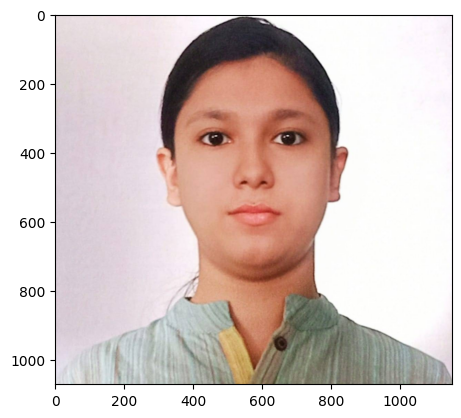

In [141]:
plt.imshow(img)

In [142]:
MIN_FILE_SIZE = 5000
MAX_FILE_SIZE = 1024000
FILE_SIZE_UNITS = ['B' , 'KB' , 'MB' ]

MIN_RES_WIDTH = 200
MIN_RES_LENGTH = 260

MAX_RES_WIDTH = 530
MAX_RES_LENGTH = 690

MIN_ASPECT_RATIO = 0.66

MAX_ASPECT_RATIO = 0.89

ALLOW_CROP = True

MIN_JPEG_QUALITY = 30

In [143]:
img.shape[:2]

(1071, 1150)

In [144]:

l ,w = img.shape[:2]
img_aspect_ratio = w / l
logger.info('checking aspect ratio')
logger.info(f'image width : {w} , image height : {l} , image aspect ratio : {img_aspect_ratio}')
if ALLOW_CROP :
    logger.info('cropping image')
    if img_aspect_ratio < MIN_ASPECT_RATIO :
        logger.info(f'image aspect ratio is : {img_aspect_ratio} but allowed minimum aspect ration is {MIN_ASPECT_RATIO}')
        del_y = math.ceil(l - (w * (1/MIN_ASPECT_RATIO)))
        del_y_1 = del_y // 2
        del_y_2 = del_y - del_y_1
        img = img[ del_y_1 : l - del_y_2 , :]
    elif img_aspect_ratio > MAX_ASPECT_RATIO :
        logger.info(f'image aspect ratio is : {img_aspect_ratio} but allowed maximum aspect ration is {MAX_ASPECT_RATIO}')
        del_x = math.ceil(w - (l * MAX_ASPECT_RATIO))
        del_x_1 = del_x //2 
        del_x_2 = del_x - del_x_1
        img = img[ : , del_x_1 : w - del_x_2]
    
logger.info('checking resolution')
l ,w = img.shape[:2]
target_width = None
if w < MIN_RES_WIDTH :
    target_width = MIN_RES_WIDTH
elif  w > MAX_RES_WIDTH :
    target_width = MAX_RES_WIDTH
if target_width != None : 
    l_1 = (l * target_width) // w
    target_dim = (target_width , l_1)
    img = cv2.resize(img, target_dim , interpolation = cv2.INTER_LINEAR)

img_quality = 90    
img_file_name = 'resized.jpg'
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
while True :
    cv2.imwrite(img_file_name, img, [int(cv2.IMWRITE_JPEG_QUALITY), img_quality])
    img_size = os.path.getsize(img_file_name)
    img_quality -= 10
    img_quality = min(img_quality,10)
    if img_size <= MAX_FILE_SIZE :
        break


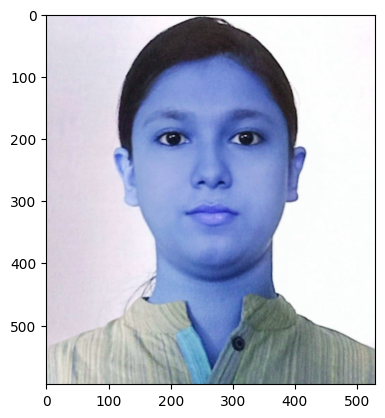

In [145]:
plt.imshow(img)